In [316]:
from datetime import datetime as dt
from ast import literal_eval
import pandas as pd
import matplotlib.pyplot as plt

In [317]:
# preview lotto dataframe
lotto_df = pd.read_csv("lotto_data.csv")
lotto_df.head()

,Unnamed: 0,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
0,0,Grand Lotto 6/55,40-17-12-29-11-48,8/11/2025,"66,935,255.00",0
1,1,Megalotto 6/45,40-10-16-28-07-09,8/11/2025,"38,521,162.80",2
2,2,4D Lotto,7-0-7-5,8/11/2025,"42,039.00",20
3,3,3D Lotto 2PM,8-1-2,8/11/2025,"4,500.00",594
4,4,3D Lotto 5PM,4-2-2,8/11/2025,"4,500.00",329


In [318]:
pd.set_option('display.float_format', '{:,.2f}'.format)
lotto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32871 entries, 0 to 32870
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     32871 non-null  int64 
 1   LOTTO GAME     32871 non-null  object
 2   COMBINATIONS   32871 non-null  object
 3   DRAW DATE      32871 non-null  object
 4   JACKPOT (PHP)  32871 non-null  object
 5   WINNERS        32871 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.5+ MB


In [319]:
# drop Unnamed: 0 column
lotto_df = lotto_df.drop('Unnamed: 0', axis=1)
lotto_df.head()

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
0,Grand Lotto 6/55,40-17-12-29-11-48,8/11/2025,"66,935,255.00",0
1,Megalotto 6/45,40-10-16-28-07-09,8/11/2025,"38,521,162.80",2
2,4D Lotto,7-0-7-5,8/11/2025,"42,039.00",20
3,3D Lotto 2PM,8-1-2,8/11/2025,"4,500.00",594
4,3D Lotto 5PM,4-2-2,8/11/2025,"4,500.00",329


In [320]:
# 3D Lotto, 2D Lotto, and Suertres Lotto were listed including their timeslot
# For simplicity, they can just be merged as one, like the rest of Lotto Games
print("old games: ", lotto_df["LOTTO GAME"].unique(),'\n')

replace_dict = {"2D Lotto": ['2D Lotto 2PM', '2D Lotto 5PM', '2D Lotto 9PM'],
                "3D Lotto": ['3D Lotto 2PM', '3D Lotto 5PM', '3D Lotto 9PM'],
                "Suertres Lotto": ['Suertres Lotto 11:30AM', 'Suertres Lotto 12:30PM', 'Suertres Lotto 2PM'],
                "EZ2 Lotto": ['EZ2 Lotto 11:30AM', 'EZ2 Lotto 12:30PM', 'EZ2 Lotto 2PM']            
               }

for k, v in replace_dict.items():
    lotto_df["LOTTO GAME"] = lotto_df["LOTTO GAME"].replace(v, k)

print("updated games: ", lotto_df["LOTTO GAME"].unique(), '\n')

print("number of lotto games: ", lotto_df["LOTTO GAME"].nunique())

old games:  ['Grand Lotto 6/55' 'Megalotto 6/45' '4D Lotto' '3D Lotto 2PM'
 '3D Lotto 5PM' '3D Lotto 9PM' '2D Lotto 2PM' '2D Lotto 5PM'
 '2D Lotto 9PM' 'Ultra Lotto 6/58' 'Superlotto 6/49' 'Lotto 6/42'
 '6D Lotto' 'Suertres Lotto 11:30AM' 'Suertres Lotto 12:30PM'
 'Suertres Lotto 2PM' 'EZ2 Lotto 2PM' 'EZ2 Lotto 11:30AM'
 'EZ2 Lotto 12:30PM'] 

updated games:  ['Grand Lotto 6/55' 'Megalotto 6/45' '4D Lotto' '3D Lotto' '2D Lotto'
 'Ultra Lotto 6/58' 'Superlotto 6/49' 'Lotto 6/42' '6D Lotto'
 'Suertres Lotto' 'EZ2 Lotto'] 

number of lotto games:  11


In [321]:
# convert 'DRAW DATE' column to datetime
lotto_df['DRAW DATE'] = pd.to_datetime(lotto_df['DRAW DATE'])

# convert 'JACKPOT (PHP)' column to float
lotto_df['JACKPOT (PHP)'] = lotto_df['JACKPOT (PHP)'].str.replace(",", "")
lotto_df['JACKPOT (PHP)'] = pd.to_numeric(lotto_df['JACKPOT (PHP)'])

for column in lotto_df.columns:
    print(f"Column {column} type: ", lotto_df[column].dtype)

lotto_df.head()

Column LOTTO GAME type:  object
Column COMBINATIONS type:  object
Column DRAW DATE type:  datetime64[ns]
Column JACKPOT (PHP) type:  float64
Column WINNERS type:  int64


,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
0,Grand Lotto 6/55,40-17-12-29-11-48,2025-08-11,"66,935,255.00",0
1,Megalotto 6/45,40-10-16-28-07-09,2025-08-11,"38,521,162.80",2
2,4D Lotto,7-0-7-5,2025-08-11,"42,039.00",20
3,3D Lotto,8-1-2,2025-08-11,"4,500.00",594
4,3D Lotto,4-2-2,2025-08-11,"4,500.00",329


In [322]:
lotto_df["COMBINATIONS"] = lotto_df["COMBINATIONS"].str.split('-')
lotto_df.head()

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
0,Grand Lotto 6/55,"[40, 17, 12, 29, 11, 48]",2025-08-11,"66,935,255.00",0
1,Megalotto 6/45,"[40, 10, 16, 28, 07, 09]",2025-08-11,"38,521,162.80",2
2,4D Lotto,"[7, 0, 7, 5]",2025-08-11,"42,039.00",20
3,3D Lotto,"[8, 1, 2]",2025-08-11,"4,500.00",594
4,3D Lotto,"[4, 2, 2]",2025-08-11,"4,500.00",329


### Winner subset for All Lotto Games

In [323]:
# subset lotto games with winners
lotto_won_df = lotto_df[lotto_df["WINNERS"]!= 0]
lotto_won_df.head()

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
1,Megalotto 6/45,"[40, 10, 16, 28, 07, 09]",2025-08-11,"38,521,162.80",2
2,4D Lotto,"[7, 0, 7, 5]",2025-08-11,"42,039.00",20
3,3D Lotto,"[8, 1, 2]",2025-08-11,"4,500.00",594
4,3D Lotto,"[4, 2, 2]",2025-08-11,"4,500.00",329
5,3D Lotto,"[8, 8, 9]",2025-08-11,"4,500.00",301


In [324]:
number_of_winners = lotto_won_df.groupby("LOTTO GAME")[["WINNERS","JACKPOT (PHP)"]]\
                                .agg(total_winners=("WINNERS", "sum"),\
                                     total_wins_millions=("JACKPOT (PHP)", "sum"),\
                                     ave_wins=("JACKPOT (PHP)", "mean"))\
                                .sort_values("LOTTO GAME").reset_index()
number_of_winners["total_wins_millions"] = number_of_winners["total_wins_millions"] / 1000000
number_of_winners

,LOTTO GAME,total_winners,total_wins_millions,ave_wins
0,2D Lotto,2963624,43.90,"4,000.00"
1,3D Lotto,4901887,49.41,"4,500.00"
2,4D Lotto,45178,66.54,"43,951.93"
3,6D Lotto,283,409.15,"2,056,031.64"
4,EZ2 Lotto,826,0.02,"4,000.00"
5,Grand Lotto 6/55,509,"7,560.74","108,010,608.10"
6,Lotto 6/42,230,"5,466.69","26,929,501.49"
7,Megalotto 6/45,184,"6,480.70","41,542,931.31"
8,Suertres Lotto,3533,0.03,"4,500.00"
9,Superlotto 6/49,113,"7,030.11","68,922,642.89"


# Most frequent numbers in winning combinations with actual winners (Grand Lotto 6/55)

Yearly line chart average of total prices
Most common number in each 

### Create subset

In [325]:
grand_lotto_df = lotto_df[lotto_df["LOTTO GAME"] == 'Grand Lotto 6/55']
grand_lotto_list = [int(str_num) for str_list in grand_lotto_df["COMBINATIONS"] for str_num in str_list]
print(grand_lotto_list)

[40, 17, 12, 29, 11, 48, 42, 30, 49, 6, 3, 45, 17, 25, 4, 11, 37, 52, 44, 8, 12, 29, 5, 39, 1, 53, 46, 52, 8, 18, 42, 13, 52, 4, 31, 12, 12, 13, 55, 2, 30, 14, 9, 35, 45, 52, 41, 38, 11, 32, 16, 9, 4, 24, 39, 31, 19, 24, 29, 12, 35, 49, 44, 53, 16, 31, 32, 53, 20, 8, 45, 54, 1, 2, 31, 13, 14, 44, 46, 54, 21, 51, 49, 42, 52, 13, 40, 27, 5, 11, 25, 35, 19, 12, 5, 45, 42, 55, 49, 29, 3, 36, 11, 29, 13, 48, 20, 9, 3, 54, 24, 36, 18, 46, 5, 3, 42, 27, 45, 34, 1, 7, 2, 11, 41, 37, 18, 8, 42, 3, 32, 24, 5, 8, 22, 6, 2, 45, 3, 45, 5, 18, 21, 28, 36, 32, 28, 14, 49, 45, 33, 55, 48, 19, 1, 50, 25, 32, 46, 44, 26, 36, 43, 17, 37, 9, 53, 4, 17, 19, 2, 6, 9, 42, 53, 26, 3, 22, 1, 6, 36, 12, 2, 26, 51, 29, 52, 33, 40, 48, 31, 6, 51, 49, 21, 17, 47, 54, 4, 19, 43, 25, 47, 26, 27, 21, 49, 2, 16, 7, 43, 24, 7, 29, 8, 27, 33, 51, 28, 23, 31, 20, 30, 29, 42, 28, 2, 43, 51, 21, 42, 4, 25, 17, 10, 26, 43, 45, 4, 30, 51, 9, 42, 28, 40, 31, 24, 52, 20, 34, 22, 43, 27, 24, 1, 31, 53, 23, 22, 2, 35, 37, 42, 19

In [326]:
# Most frequently occurring numbers
grand_lotto_series = pd.Series(grand_lotto_list)
list(grand_lotto_series.value_counts().head(10).reset_index()["index"])

[52, 6, 54, 28, 9, 20]

In [327]:
# Least frequently occurring numbers
list(grand_lotto_series.value_counts().tail(10).reset_index()["index"])

[36, 32, 46, 18, 31, 53]

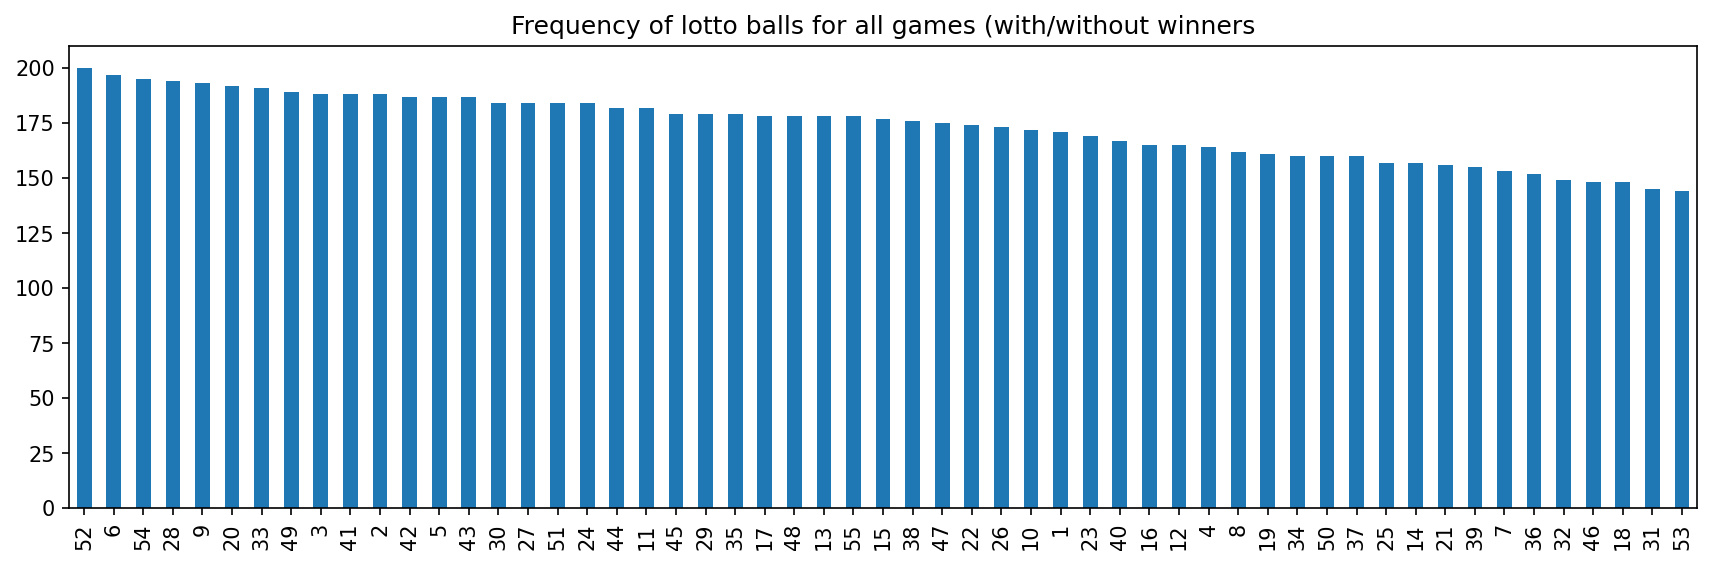

In [328]:
plt.figure(figsize=(14, 4), dpi=150)
plt.title("Frequency of lotto balls for all games (with/without winners")
grand_lotto_series.value_counts().plot(kind="bar")
plt.show()

In [329]:
grand_lotto_won_df = lotto_won_df[lotto_won_df["LOTTO GAME"] == 'Grand Lotto 6/55']
grand_lotto_won_list = [int(str_num) for str_list in grand_lotto_won_df["COMBINATIONS"] for str_num in str_list]
print(grand_lotto_won_list)

[3, 54, 24, 36, 18, 46, 30, 29, 42, 28, 2, 43, 13, 21, 24, 31, 9, 3, 45, 46, 33, 23, 3, 48, 21, 40, 15, 55, 10, 54, 27, 1, 16, 11, 50, 3, 31, 3, 17, 47, 24, 20, 8, 16, 25, 44, 6, 34, 17, 26, 30, 39, 14, 7, 24, 50, 52, 9, 51, 3, 52, 8, 41, 11, 27, 31, 30, 17, 6, 12, 4, 29, 55, 50, 6, 45, 12, 40, 19, 32, 25, 12, 17, 36, 5, 1, 27, 26, 44, 11, 11, 17, 28, 6, 9, 1, 28, 32, 12, 9, 18, 50, 4, 16, 26, 24, 14, 47, 26, 23, 34, 41, 45, 29, 45, 29, 12, 3, 26, 51, 9, 8, 5, 1, 30, 52, 3, 44, 10, 13, 23, 11, 44, 13, 19, 33, 27, 39, 40, 3, 34, 37, 19, 15, 44, 50, 7, 52, 46, 36, 9, 45, 36, 27, 18, 54, 2, 18, 49, 7, 19, 47, 9, 17, 45, 39, 35, 15, 39, 29, 9, 21, 19, 20, 29, 42, 12, 41, 1, 35, 7, 13, 5, 25, 28, 3, 13, 19, 43, 33, 41, 46, 13, 1, 50, 10, 51, 54, 38, 35, 11, 22, 39, 47, 18, 52, 17, 2, 54, 55, 2, 12, 22, 27, 3, 29, 25, 54, 4, 22, 55, 24, 45, 25, 50, 10, 15, 5, 32, 7, 10, 21, 20, 19, 2, 4, 6, 8, 24, 1, 17, 7, 38, 8, 5, 10, 34, 9, 28, 24, 19, 42, 1, 26, 47, 42, 19, 17, 9, 18, 10, 2, 12, 24, 2, 

In [330]:
# Most frequently occurring numbers
grand_lotto_won_series = pd.Series(grand_lotto_won_list)
list(grand_lotto_won_series.value_counts().head(10).reset_index()["index"])

[19, 9, 3, 12, 24, 17]

In [331]:
# Least frequently occurring numbers
list(grand_lotto_series.value_counts().tail(10).reset_index()["index"])

[40, 33, 37, 48, 49, 53]

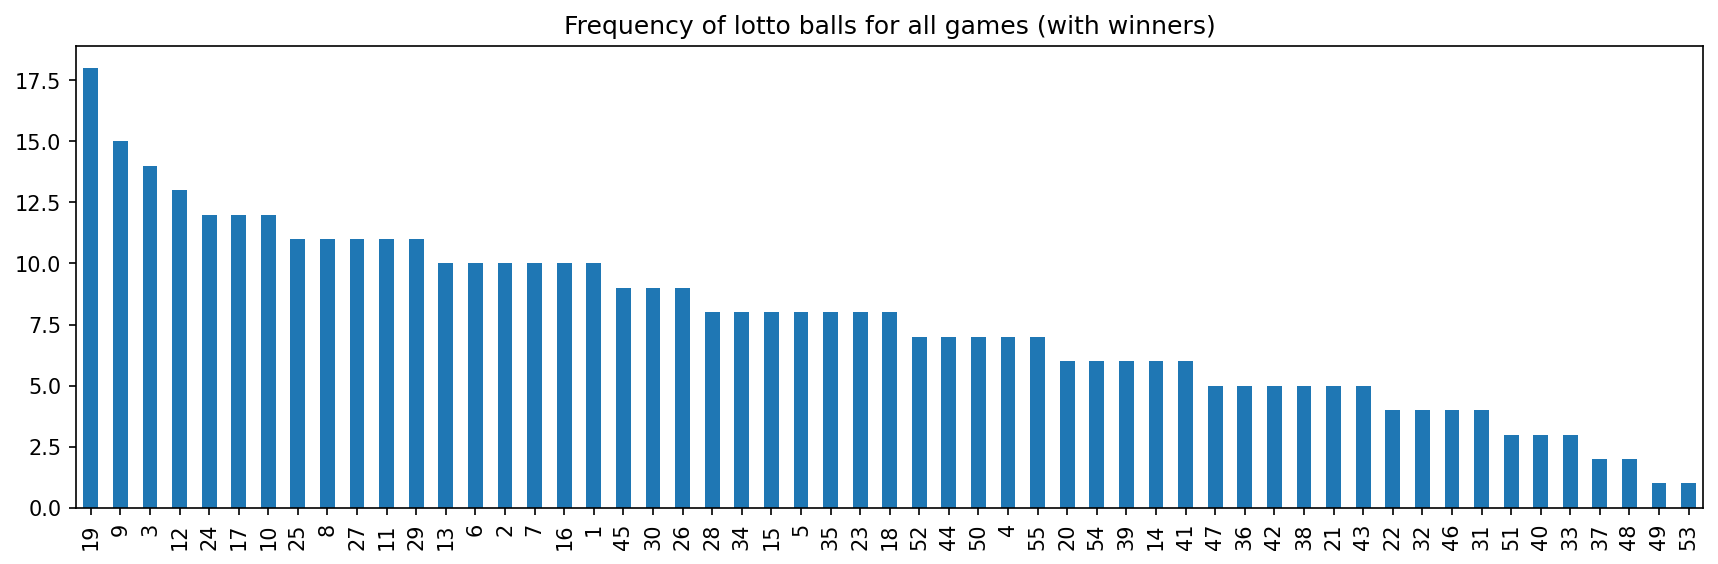

In [332]:
plt.figure(figsize=(14, 4), dpi=150)
plt.title("Frequency of lotto balls for all games (with winners)")
grand_lotto_won_series.value_counts().plot(kind="bar")
plt.show()

In [334]:
# Get common numbers (ALL winning balls & Winning balls with winners)

all_frequent_numbers = set(list(grand_lotto_series.value_counts().head(6).reset_index()["index"]))
all_infrequent_numbers = set(list(grand_lotto_series.value_counts().tail(6).reset_index()["index"]))

win_frequent_numbers = set(list(grand_lotto_won_series.value_counts().head(6).reset_index()["index"]))
win_infrequent_numbers = set(list(grand_lotto_won_series.value_counts().tail(6).reset_index()["index"]))

overlapping_frequent_numbers = all_frequent_numbers & win_frequent_numbers
overlapping_infrequent_numbers = all_infrequent_numbers & win_infrequent_numbers

print(overlapping_frequent_numbers)
print(overlapping_infrequent_numbers)

{9}
{53}
